Task 1 - Simple image processing (adding blur and sharpness)

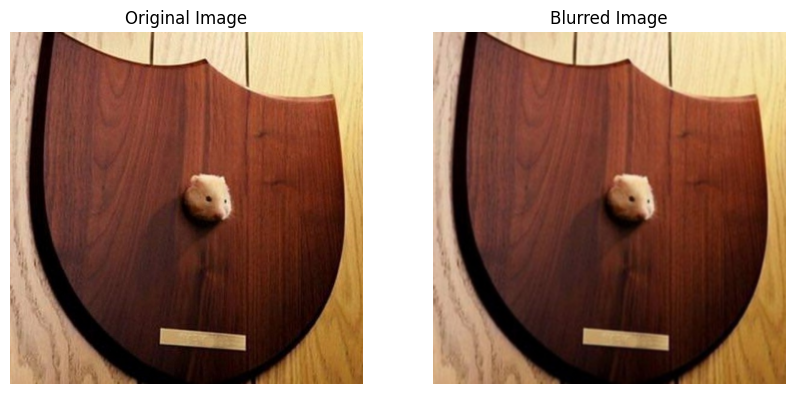

In [2]:
import cv2
import matplotlib.pyplot as plt

def blur_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Apply Gaussian Blur
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)  # 5x5 kernel, 0 sigma

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(blurred_image)
    plt.title('Blurred Image')
    plt.axis('off')

    plt.show()

blur_image('img.jpg')


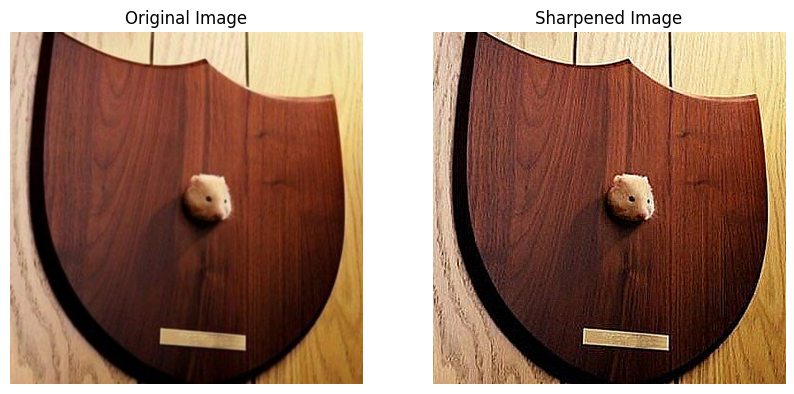

In [3]:
import numpy as np

def sharpen_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Create a kernel for sharpening
    sharpening_kernel = np.array([[-1, -1, -1],
                                  [-1,  9, -1],
                                  [-1, -1, -1]])

    # Applying the sharpening kernel
    sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(sharpened_image)
    plt.title('Sharpened Image')
    plt.axis('off')

    plt.show()

sharpen_image('img.jpg')


 Task 2. Face detection with OpenCV

Face on the first image:  None
Face on the second image:  True


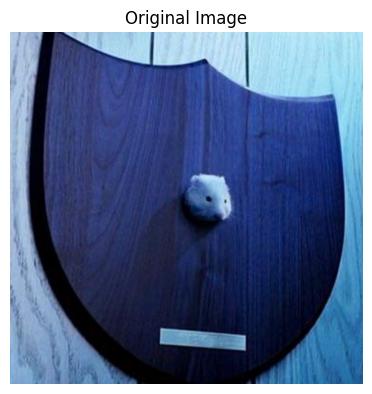

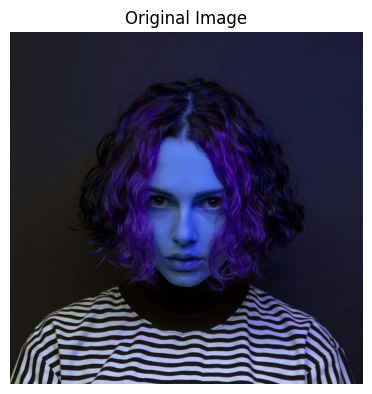

In [27]:
import cv2

def detect_face(image_path):
    # Load the pre-trained Haar Cascade for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Check if a face is detected
    if len(faces) == 0:
        return None
    else:
        # Assuming only one face, return the coordinates of the first detected face
        return faces[0]

# Example
image1 = cv2.imread('img.jpg')
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.title('Original Image')
plt.axis('off')

image2 = cv2.imread('face.jpg')
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image2)
plt.title('Original Image')
plt.axis('off')

face_coordinates = detect_face('img.jpg')
face_coordinates2 = detect_face('face.jpg')
if face_coordinates2.any():
  face_coordinates2 = True
print("Face on the first image: ", face_coordinates)
print("Face on the second image: ", face_coordinates2)


Task 3 - Passport photo detection with OpenCV

{'Color Check': True,
 'Orientation Check': False,
 'Face Detected': True,
 'Eyes Detected': True,
 'Eyes Level Check': True,
 'Head Size Check': False}

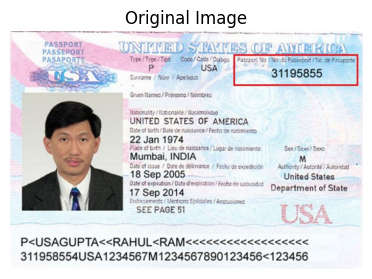

In [6]:
import cv2
import numpy as np

# Load the image from file system
image_path = 'id.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Function to check if an image is a color image
def is_color_image(img):
    # Check if an image is a color image
    if len(img.shape) == 3 and img.shape[2] == 3:
        # Check if R=G=B for each pixel
        if np.all(img[:,:,0] == img[:,:,1]) and np.all(img[:,:,1] == img[:,:,2]):
            return False
    return True

# Function to check the orientation of the image
def check_orientation(img):
    height, width = img.shape[:2]
    return height >= width

# Function to detect eyes within the face region
def detect_eyes(face, gray_image):
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    roi_gray = gray_image[face[1]:face[1]+face[3], face[0]:face[0]+face[2]]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    return eyes

# Function to check if eyes are at the same level
def check_eye_level(eyes):
    if len(eyes) == 2:
        # Check if the eyes are approximately on the same level
        return abs(eyes[0][1] - eyes[1][1]) <= 5
    return False

# Function to check the head size relative to the photo
def check_head_size(face, img_area):
    face_area = face[2] * face[3]
    proportion = face_area / img_area
    return 0.2 <= proportion <= 0.5

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load pre-trained Haar cascades for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Check if the image is a color image
color_check = is_color_image(image)

# Check the orientation of the image
orientation_check = check_orientation(image)

# Variables to store checks results
eyes_detected = False
eyes_level_check = False
head_size_check = False

# If a face is detected, proceed with further checks
if len(faces) == 1:
    # Detect eyes and check if they are level
    eyes = detect_eyes(faces[0], gray)
    eyes_detected = len(eyes) > 0
    eyes_level_check = check_eye_level(eyes) if eyes_detected else False
    # Check the size of the head relative to the photo
    head_size_check = check_head_size(faces[0], image.shape[0] * image.shape[1])

# Compile the results
results = {
    "Color Check": color_check,
    "Orientation Check": orientation_check,
    "Face Detected": len(faces) == 1,
    "Eyes Detected": eyes_detected,
    "Eyes Level Check": eyes_level_check,
    "Head Size Check": head_size_check
}

results


Here we can see that this approach not the best one and require callibration, beacause as we can see, image seems like passport photo, but some tests was failed (Orientation and Head Size), those parametrs could differ from country to country, so this is not the most optimal solution.

Task 5 - Passport photo detection with Convolutional Neural Networks (CNNs)

In [21]:
import pandas as pd
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


train_df = pd.read_csv('corrected_train.csv', sep=',')
valid_df = pd.read_csv('corrected_valid.csv', sep=',')
test_df = pd.read_csv('corrected_test.csv', sep=',')
# print(train_df.columns)


# fit to the correct format
if 'filename,label' in train_df.columns:
    train_df[['filename', 'label']] = train_df['filename,label'].str.split(',', expand=True)
    train_df.drop('filename,label', axis=1, inplace=True)

if 'filename,label' in valid_df.columns:
    valid_df[['filename', 'label']] = valid_df['filename,label'].str.split(',', expand=True)
    valid_df.drop('filename,label', axis=1, inplace=True)

if 'filename,label' in test_df.columns:
    test_df[['filename', 'label']] = test_df['filename,label'].str.split(',', expand=True)
    test_df.drop('filename,label', axis=1, inplace=True)
print(train_df.columns)

# reading data
def load_dataset(csv_file_path, images_dir, image_size):
    # df = pd.read_csv(csv_file_path)
    df = csv_file_path
    images = []
    labels = []

    for i, row in df.iterrows():
        image_filename = row['filename']
        label = row['label']
        image_path = os.path.join(images_dir, image_filename)
        image = load_img(image_path, target_size=image_size)
        image = img_to_array(image)
        image /= 255.0  # normalize to [0, 1]

        images.append(image)
        labels.append(label)

    return np.array(images), np.array(labels)


image_size = (150, 150)

# loading data
train_images, train_labels = load_dataset(train_df, './train', image_size)
valid_images, valid_labels = load_dataset(valid_df, './valid', image_size)
test_images, test_labels = load_dataset(test_df, './test', image_size)


# Convert labels to numeric format if they are not already
train_labels = (train_labels == 'True').astype(int)
valid_labels = (valid_labels == 'True').astype(int)
test_labels = (test_labels == 'True').astype(int)



model = Sequential([
    # First convolutional layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    # Second convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # As the output of convolutional and pooling layers are multi-dimensional,
    # we need to flatten them into a one-dimensional array before feeding them into the dense layers
    Flatten(),

    # 512 neuron hidden layer
    Dense(512, activation='softmax'),

    # Output layer with a single neuron for binary classification
    Dense(1, activation='sigmoid')
])

model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_images, train_labels,
    epochs=15,
    validation_data=(valid_images, valid_labels)
)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_accuracy)



Index(['filename', 'label'], dtype='object')
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 82944)             0         
                                                                 
 dense_8 

Task 6 - Computing the accuracy on the test set (CNN accuracy was shown in previous step, but here are shown accuracy of the OpenCV perforamnce)

In [11]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt

test_df = pd.read_csv('corrected_test.csv', sep=',')

if 'filename,label' in test_df.columns:
    test_df[['filename', 'label']] = test_df['filename,label'].str.split(',', expand=True)
    test_df.drop('filename,label', axis=1, inplace=True)


correct_predictions = 0
total_images = len(test_df)

for index, row in test_df.iterrows():
    image_path = './test/' + row['filename']
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply the checks as in code
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    color_check = is_color_image(image)
    orientation_check = check_orientation(image)

    eyes_detected = False
    eyes_level_check = False
    head_size_check = False

    if len(faces) == 1:
        eyes = detect_eyes(faces[0], gray)
        eyes_detected = len(eyes) > 0
        eyes_level_check = check_eye_level(eyes) if eyes_detected else False
        head_size_check = check_head_size(faces[0], image.shape[0] * image.shape[1])

    # Combine the results of all checks
    all_checks_passed = color_check and orientation_check and len(faces) == 1 and eyes_detected and eyes_level_check and head_size_check

    # Compare with the actual label
    actual_label = row['label'] == 'True'
    if all_checks_passed == actual_label:
        correct_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / total_images
print(f"Accuracy: {accuracy}")


Accuracy: 0.7142857142857143


Task 7 - Formulate conclusions

1. Which Approach Performs Better and Why?

- The CNN performs better with an accuracy of 85.71% compared to 71.43% for the custom check-based approach.

- CNNs are effective in learning complex patterns in images, handling variations in lighting, orientation, and scale more robustly than manual checks.

- The custom check-based approach relies on specific programmed rules and may not capture all the nuances that a CNN can learn from data.

2. Is it Useful to Use a CNN for this Task? Why?

- CNN is useful for this task. CNNs are powerful in image classification tasks due to their ability to learn hierarchical features and patterns directly from the data, which is particularly beneficial in complex image recognition tasks like passport photo validation.

- CNNs can automatically and adaptively learn spatial hierarchies of features from image data, making them more versatile and accurate for image classification tasks.

3. How to Improve the Results Obtained with the CNN?

- **Data Augmentation:** Increase the diversity of the training set by applying transformations like rotation, scaling, and flipping to the images.

- **Hyperparameter Tuning:** Experiment with different network architectures, learning rates, batch sizes, and other hyperparameters.

- **Regularization Techniques:** Use dropout, batch normalization, or L2 regularization to prevent overfitting.

- **Advanced Architectures:** Explore more advanced CNN architectures like ResNet, Inception, or EfficientNet.

4. Comments on the Dataset

- The dataset might not be entirely representative or diverse enough if the accuracy is not close to 100%. It's crucial to have a balanced and diverse dataset that includes a wide range of cases the model might encounter in real-world scenarios.

- The quality of the dataset is also important. Ensure the images are properly labeled and of good quality.

5. Real-Life Applicability of the System

- While the CNN shows promising results, achieving high accuracy in a controlled test environment doesn't always translate to real-world scenarios, which are often more complex and variable.

- Issues like different lighting conditions, backgrounds, and image qualities in real-life scenarios can affect the model's performance.

- Continuous testing and updating with real-world data are necessary for the system to be reliable in practical applications.

6. Approaches to Obtain More Data

- **Data Augmentation:** Artificially increase the size of the dataset by applying various transformations to the existing images.

- **Crowdsourcing:** Gather more data from various sources, potentially using online platforms to collect a more diverse set of images.

- **Collaborations:** Partner with organizations or institutions that can provide additional data.

- **Synthetic Data Generation:** Use techniques like GANs (Generative Adversarial Networks) to generate synthetic but realistic images.

Task 8 - Additional approaches to get a better score (e.g regularization, hyperparameter
optimization techniques, generative AI, data augmentation, etc.)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

train_df = pd.read_csv('corrected_train.csv', sep=',')
valid_df = pd.read_csv('corrected_valid.csv', sep=',')
test_df = pd.read_csv('corrected_test.csv', sep=',')
print(train_df.columns)

if 'filename,label' in train_df.columns:
    train_df[['filename', 'label']] = train_df['filename,label'].str.split(',', expand=True)
    train_df.drop('filename,label', axis=1, inplace=True)


if 'filename,label' in valid_df.columns:
    valid_df[['filename', 'label']] = valid_df['filename,label'].str.split(',', expand=True)
    valid_df.drop('filename,label', axis=1, inplace=True)

if 'filename,label' in test_df.columns:
    test_df[['filename', 'label']] = test_df['filename,label'].str.split(',', expand=True)
    test_df.drop('filename,label', axis=1, inplace=True)
print(train_df.columns)



# ImageDataGenerator with augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# ImageDataGenerator for validation and test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Apply the data augmentation to the training dataset
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='./train',
    x_col='filename',
    y_col='label',
    target_size=image_size,
    batch_size=32,
    class_mode='binary'
)

# Prepare validation and test data without augmentation
validation_generator = test_datagen.flow_from_dataframe(
    dataframe=valid_df,
    directory='./valid',
    x_col='filename',
    y_col='label',
    target_size=image_size,
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory='./test',
    x_col='filename',
    y_col='label',
    target_size=image_size,
    batch_size=32,
    class_mode='binary'
)


image_size = (150, 150)

# Convert labels to numeric format if they are not already
train_labels = pd.read_csv('corrected_train.csv', sep=',')
valid_labels = pd.read_csv('corrected_valid.csv', sep=',')
test_labels = pd.read_csv('corrected_test.csv', sep=',')

train_labels = (train_labels == 'True').astype(int)
valid_labels = (valid_labels == 'True').astype(int)
test_labels = (test_labels == 'True').astype(int)


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # Adding dropout

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # Adding dropout

    Flatten(),
    Dense(512, activation='softmax'),
    Dropout(0.5),  # Adding dropout

    Dense(1, activation='sigmoid')
])

model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_images, train_labels,
    epochs=15,
    validation_data=(valid_images, valid_labels)
)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_accuracy)



Index(['filename,label'], dtype='object')
Index(['filename', 'label'], dtype='object')
Found 30 validated image filenames belonging to 2 classes.
Found 10 validated image filenames belonging to 2 classes.
Found 7 validated image filenames belonging to 2 classes.
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 64)        18496     
                                                       

In [17]:
# Convert test_labels to a numpy array if it's not already
test_labels_array = np.array(test_labels).flatten()

# Flatten predicted_test_labels
predicted_test_labels_flat = predicted_test_labels.flatten()

# Ensure both arrays are of the same length
if len(predicted_test_labels_flat) != len(test_labels_array):
    raise ValueError("The lengths of predicted and actual labels do not match.")

# Count the number of correct predictions
correct_predictions = np.sum(predicted_test_labels_flat == test_labels_array)

# Total number of images in the test set
total_images = len(test_labels_array)

# Calculate the accuracy
accuracy = correct_predictions / total_images
print(f"Manually Calculated Accuracy: {accuracy}")


Manually Calculated Accuracy: 1.0


As we can see, adding regularization techincs and receiving more data by augmentation, did not provide good result as expected. Adding more data to the training set expected guve us bigger data set and dropout expected to reduce overfitting, but instead we received 100% accuracy, which at the first look could be VERY good result, but we know that results like this, very likely, indicate hidden errors rather then good performence, and at this case, model with 85% accuracy are more reliable than the model with 100% accuracy.   